In [27]:
import pandas as pd
df = pd.read_csv("../data/cleaned_complaints.csv")
df.head()

,date_received,narrative,company,issue,clean_narrative
0,2025-01-20,Iam filling this complaint because XXXX has re...,"EQUIFAX, INC.",Improper use of your report,iam fill complaint xxxx repeatedly fail comply...
1,2025-01-11,LexisNexis sent me an email today at approxima...,LEXISNEXIS,Problem with a company's investigation into an...,lexisnexis send email today approximately xxxx...
2,2025-01-09,My account with XXXX XXXX TRANSUNION was never...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Incorrect information on your report,account xxxx xxxx transunion never late except...
3,2025-02-11,I am a victim of XXXX. The information listed ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Incorrect information on your report,victim xxxx information list appear credit rep...
4,2025-01-23,PLEASE BLOCKED AND REMOVED I respectfully requ...,Experian Information Solutions Inc.,Incorrect information on your report,block remove respectfully request promptly dec...


## Sentence Embedding with Pre-trained Transformer

In [48]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")

topic_model = BERTopic(
    embedding_model=model,
    verbose=True
)

# Disable tokenizer-based representation model BEFORE fit_transform
topic_model.representation_model = None

In [ ]:
topics, probs = topic_model.fit_transform(df['clean_narrative'])

### smaller sample for testing

In [49]:
df_sample = df.sample(30000, random_state=42)
topics, probs = topic_model.fit_transform(df_sample['clean_narrative'])

2025-04-11 21:47:51,263 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/938 [00:00<?, ?it/s]

2025-04-11 21:49:18,511 - BERTopic - Embedding - Completed ✓
2025-04-11 21:49:18,511 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-04-11 21:49:27,166 - BERTopic - Dimensionality - Completed ✓
2025-04-11 21:49:27,166 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-04-11 21:49:27,755 - BERTopic - Cluster - Completed ✓
2025-04-11 21:49:27,759 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-04-11 21:49:28,284 - BERTopic - Representation - Completed ✓


In [50]:
topic_model.get_topic_info().head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,7321,-1_charge_xxxx_balance_debt,"[charge, xxxx, balance, debt, transunion, year...",[subject urgent dispute fcra violation xxxx xx...
1,0,417,0_experian_conduct_failure_dispute,"[experian, conduct, failure, dispute, finding,...",[write formally dispute inaccurate information...
2,1,410,1_acc_influence_ground_active,"[acc, influence, ground, active, attached, sta...",[submit influence not party credit bureaus sta...
3,2,404,2_amend_inaction_fulfill_unreliable,"[amend, inaction, fulfill, unreliable, outcome...",[experian fail fulfill legal obligation fair c...
4,3,394,3_identify_correction_need_review,"[identify, correction, need, review, company, ...",[review credit report identify inaccurate acco...
5,4,340,4_avoid_accordingly_litigation_future,"[avoid, accordingly, litigation, future, duty,...",[credit report inaccurate inaccuracy cause cre...
6,5,290,5_accuse_combine_unjust_thing,"[accuse, combine, unjust, thing, look, show, c...",[combine credit report show incorrect account ...
7,6,280,6_carefully_possible_review_never,"[carefully, possible, review, never, error, en...",[carefully review credit report ensure accurac...
8,7,262,7_word_go_apply_soon,"[word, go, apply, soon, enclose, delete, like,...",[write follow information remove credit file i...
9,8,250,8_experian_complie_contravene_administrative,"[experian, complie, contravene, administrative...",[file complaint against experian fail properly...


In [51]:
topic_model.get_topic(3)

[('identify', 0.10654853390254787),
 ('correction', 0.099692839052194),
 ('need', 0.06836065861225743),
 ('review', 0.06619531888430252),
 ('company', 0.0543157043760391),
 ('inaccurate', 0.018345312138669027),
 ('reporting', 0.01188218152897438),
 ('account', 0.005840181471401161),
 ('report', 0.0052954099438540835),
 ('credit', 0.004917222972885929)]

In [52]:
df_sample['topic'] = topics
df_sample['probability'] = probs

In [53]:
df_sample.head(10)

,date_received,narrative,company,issue,clean_narrative,topic,probability
59704,2025-02-05,Im filing a complaint against Equifax for fall...,Experian Information Solutions Inc.,Problem with a company's investigation into an...,file complaint against equifax fall properly i...,74,0.047851
2744,2025-02-06,"XXXX XXXX XXXX XXXX XXXX XXXX. \nXXXX XXXX, NJ...",NAVY FEDERAL CREDIT UNION,Incorrect information on your report,xxxx xxxx xxxx xxxx xxxx xxxx xxxx xxxx xxxx x...,-1,0.000000
85458,2025-01-19,"Hello, to whom it may concern, I could write o...",Experian Information Solutions Inc.,Improper use of your report,hello concern write bunch fair credit reportin...,-1,0.000000
63838,2025-01-31,"I don't remember dates, but I have tried to di...","EQUIFAX, INC.",Problem with a company's investigation into an...,n't remember date try dispute update item xxxx...,-1,0.000000
79736,2025-01-17,This CFPB complaint has been filed to request ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Incorrect information on your report,cfpb complaint file request pursuant fcra tran...,137,0.954124
11405,2025-02-05,I did not approve these transactions to be inc...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Improper use of your report,not approve transaction include consumer repor...,169,0.837570
23099,2025-02-17,"In the quiet humdrum of everyday life, a sudde...","TRANSUNION INTERMEDIATE HOLDINGS, INC.",Problem with a company's investigation into an...,quiet humdrum everyday life sudden jolt shatte...,502,1.000000
55194,2025-01-18,Recently I looked at a copy of my credit repor...,Experian Information Solutions Inc.,Improper use of your report,recently look copy credit report notice inaccu...,63,0.443721
41071,2025-02-03,I opened three ( 3 ) Student Loans with XXXX i...,Experian Information Solutions Inc.,Incorrect information on your report,open student loan xxxx xxxx student loan trans...,543,1.000000
79457,2025-01-28,I need your help to investigate accounts from ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",Incorrect information on your report,need help investigate account company report l...,186,1.000000


In [54]:
pd.crosstab(df_sample['topic'], df_sample['issue'])

issue,Credit monitoring or identity theft protection services,Identity theft protection or other monitoring services,Improper use of your report,Incorrect information on your report,Problem with a company's investigation into an existing issue,Problem with a company's investigation into an existing problem,Problem with a purchase shown on your statement,Problem with fraud alerts or security freezes,Unable to get your credit report or credit score
topic,,,,,,,,,
-1,82,2,1629,3076,26,2363,0,51,92
0,4,1,43,101,2,264,0,2,0
1,0,0,0,410,0,0,0,0,0
2,0,0,1,1,2,400,0,0,0
3,0,0,1,385,0,8,0,0,0
...,...,...,...,...,...,...,...,...,...
619,0,0,1,6,0,4,0,0,0
620,0,0,1,9,0,0,0,0,0
621,1,0,1,4,0,2,0,1,1


<Axes: xlabel='date'>

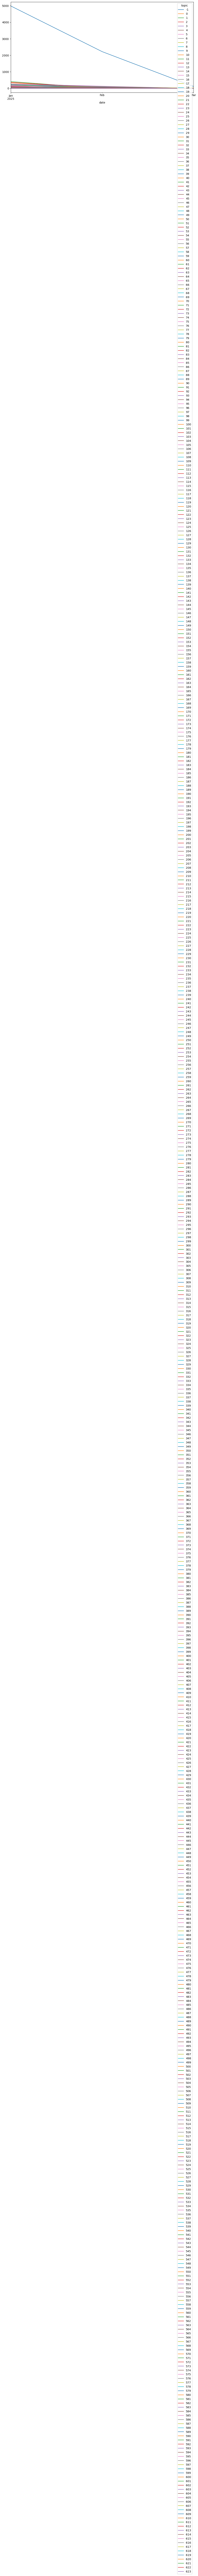

In [55]:
df_sample['date_received'] = pd.to_datetime(df_sample['date_received'])

df_sample['date'] = df_sample['date_received'].dt.to_period("M")

df_sample.groupby(['date', 'topic']).size().unstack(fill_value=0).plot(figsize=(12, 6))

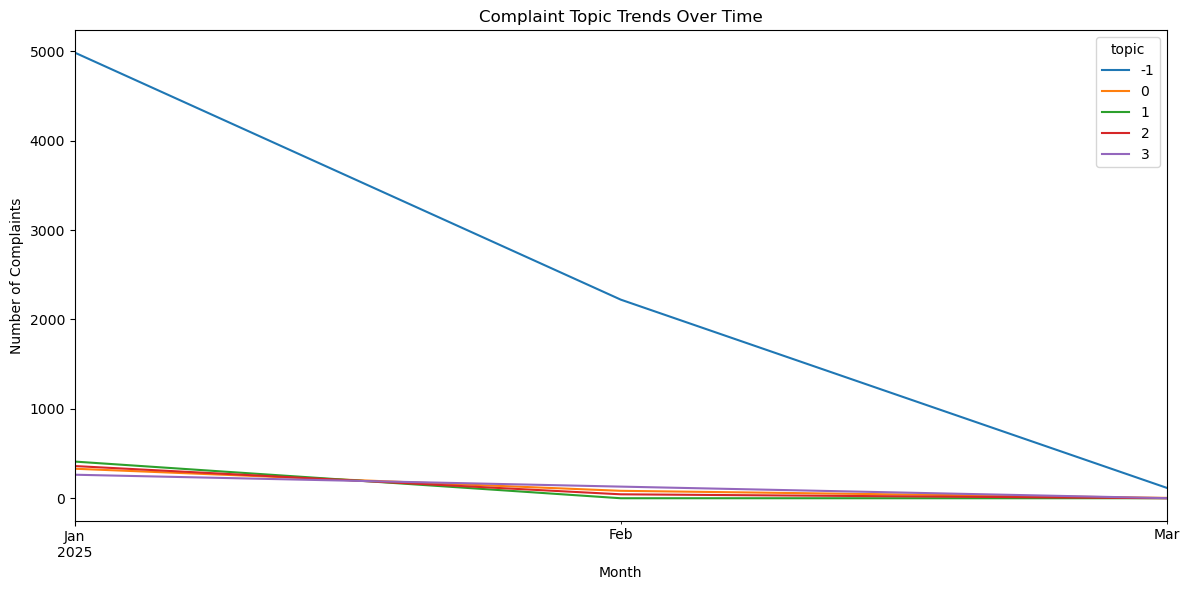

In [56]:
top_topics = df_sample['topic'].value_counts().head(5).index
df_top = df_sample[df_sample['topic'].isin(top_topics)]

df_top.groupby(['date', 'topic']).size().unstack(fill_value=0).plot(figsize=(12, 6))

import matplotlib.pyplot as plt

plt.title("Complaint Topic Trends Over Time")
plt.ylabel("Number of Complaints")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

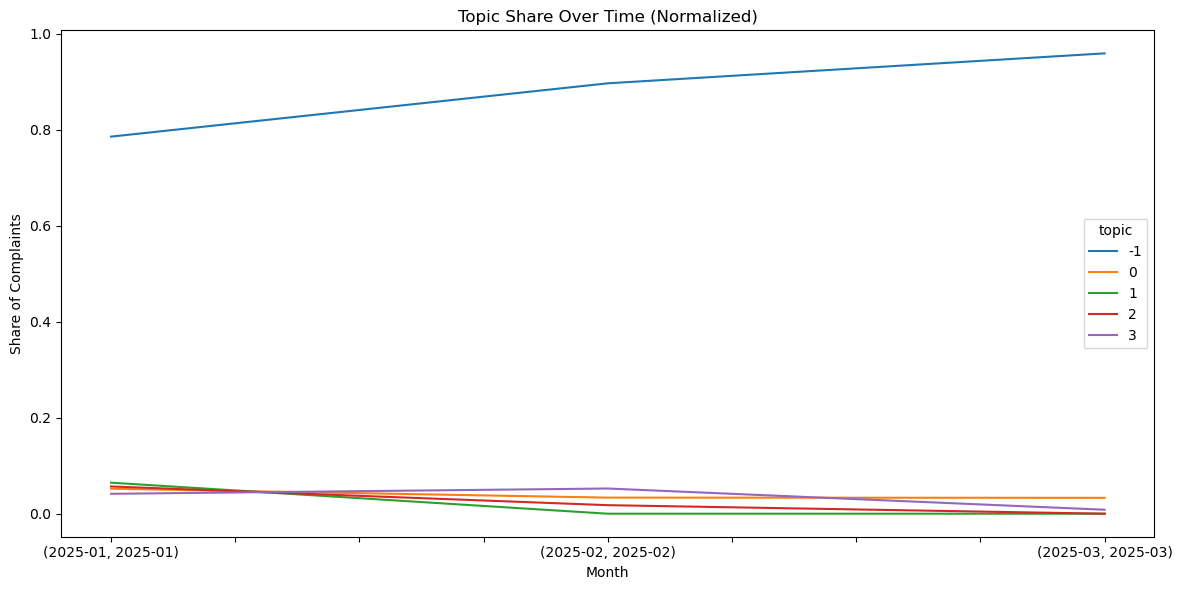

In [57]:
topic_trend = (
    df_top.groupby(['date', 'topic']).size()
    .groupby(level=0)  # normalize per month
    .apply(lambda x: x / x.sum())
    .unstack(fill_value=0)
)

ax = topic_trend.plot(figsize=(12, 6))
ax.set_title("Topic Share Over Time (Normalized)")
ax.set_ylabel("Share of Complaints")
ax.set_xlabel("Month")
plt.tight_layout()
plt.show()